In [72]:
import pandas as pd

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pydotplus
from IPython.display import Image

In [73]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [152]:

print("Total no of people who lived=",dataset[dataset['DEATH_EVENT']==0]['age'].count())
print("Total no of people who died=",dataset[dataset['DEATH_EVENT']==1]['age'].count())

#source for counting from datase
#https://www.geeksforgeeks.org/count-values-in-pandas-dataframe/

Total no of people who lived= 203
Total no of people who died= 96


In [153]:
#randomly dropping data from dataset to make equal number of outcome
'''for x in range(0,106):
    dataset = dataset.drop(dataset[dataset['DEATH_EVENT']==0].sample)'''

KeyError: '[<bound method NDFrame.sample of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \\\n14   49.0        1                        80         0                 30   \n20   65.0        1                        52         0                 25   \n23   53.0        0                        63         1                 60   \n33   50.0        1                       159         1                 30   \n38   60.0        0                      2656         1                 30   \n..    ...      ...                       ...       ...                ...   \n294  62.0        0                        61         1                 38   \n295  55.0        0                      1820         0                 38   \n296  45.0        0                      2060         1                 60   \n297  45.0        0                      2413         0                 38   \n298  50.0        0                       196         0                 45   \n\n     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \\\n14                     1   427000.0               1.0           138    0   \n20                     1   276000.0               1.3           137    0   \n23                     0   368000.0               0.8           135    1   \n33                     0   302000.0               1.2           138    0   \n38                     0   305000.0               2.3           137    1   \n..                   ...        ...               ...           ...  ...   \n294                    1   155000.0               1.1           143    1   \n295                    0   270000.0               1.2           139    0   \n296                    0   742000.0               0.8           138    0   \n297                    0   140000.0               1.4           140    1   \n298                    0   395000.0               1.6           136    1   \n\n     smoking  time  DEATH_EVENT  \n14         0    12            0  \n20         0    16            0  \n23         0    22            0  \n33         0    29            0  \n38         0    30            0  \n..       ...   ...          ...  \n294        1   270            0  \n295        0   271            0  \n296        0   278            0  \n297        1   280            0  \n298        1   285            0  \n\n[203 rows x 13 columns]>] not found in axis'

In [ ]:
x = dataset.iloc[:,:-1].values
x.shape
cols_x = dataset.iloc[:,:-1]


In [ ]:
y = dataset.iloc[:,-1].values
y.shape

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=200)

In [ ]:
model= sklearn.tree.DecisionTreeClassifier(
    criterion="entropy", random_state=200
)

In [ ]:
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=200)

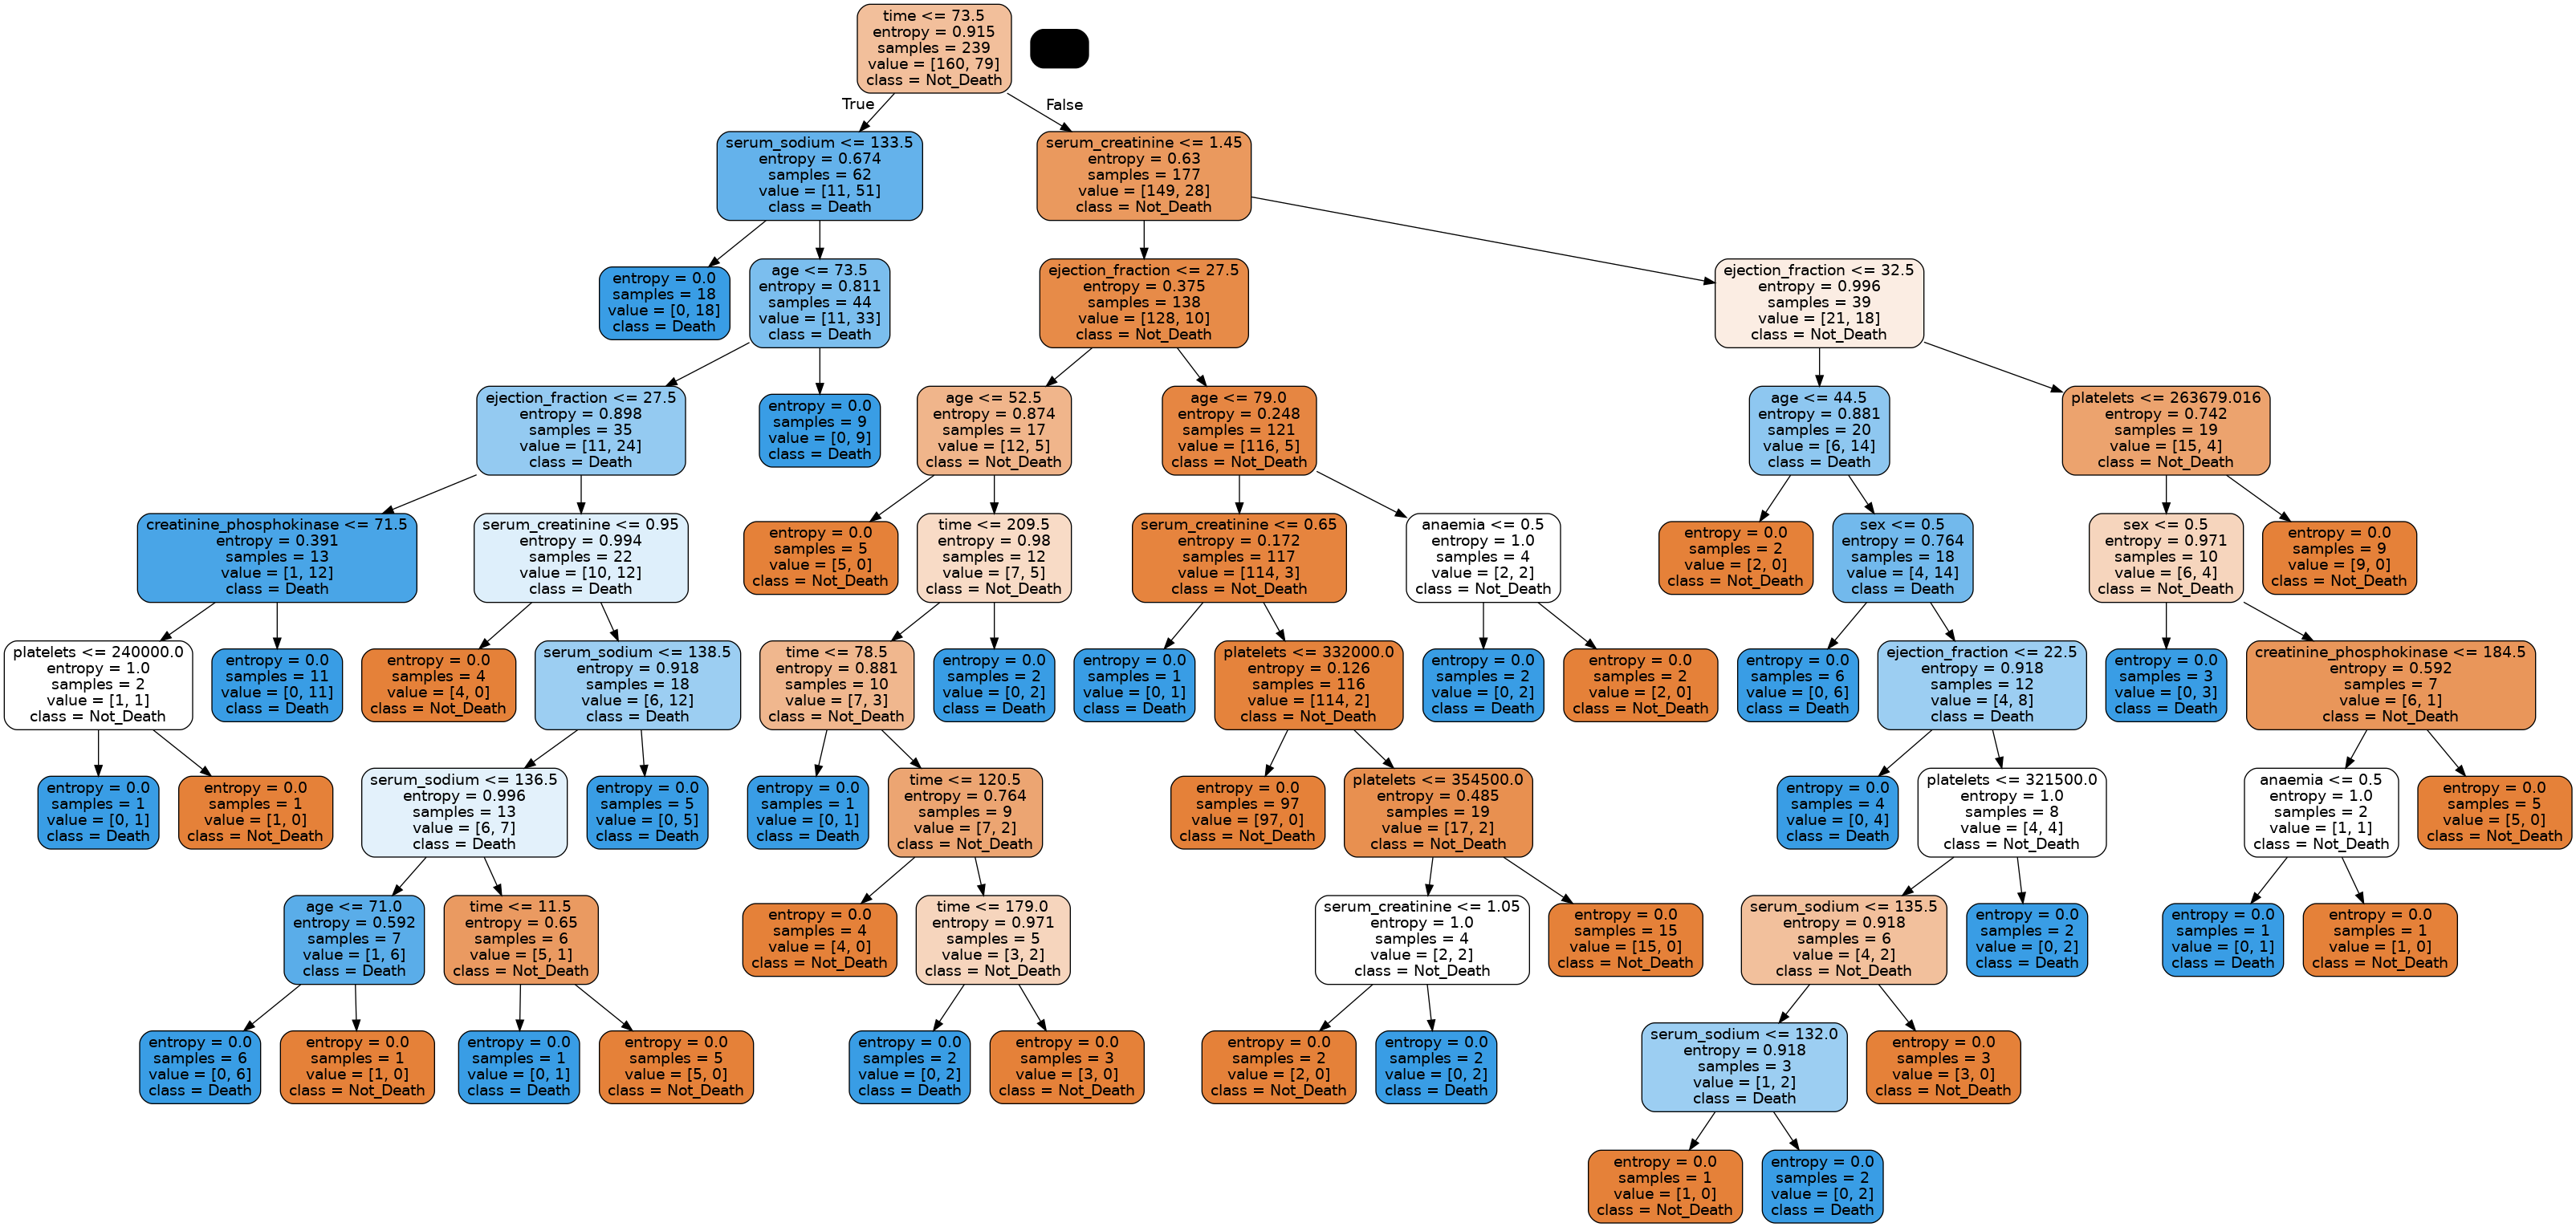

In [ ]:
data_plot = tree.export_graphviz(model, out_file=None, feature_names = list(cols_x.columns.values), class_names=['Not_Death', 'Death'], 
                                 rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(data_plot)

Image(graph.create_png())

In [ ]:
pred = model.predict(test_x)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
model.score(test_x,test_y)

0.7833333333333333

In [ ]:
confusion_matrix(test_y,pred)

array([[35,  8],
       [ 5, 12]])